In [7]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from skimage.exposure import rescale_intensity
from astropy.visualization import make_lupton_rgb
from astropy.visualization import LogStretch, AsinhStretch, ImageNormalize

files = {
    'F090M':    'reprojected/F090W.fits',
    'F150M':    'reprojected/F150M.fits',
    'F200M':    'reprojected/F200M.fits',
    'F277M':    'reprojected/F277M.fits',
    'F356M':    'reprojected/F356M.fits',
    'F444M':    'reprojected/F444M.fits',
    'F770W1':   'reprojected/F770W1.fits',
    'F1000W1':  'reprojected/F1000W1.fits'
}

# Styling options
plt.rcParams.update({
        "text.color": "white",       # Titles and labels
        "axes.labelcolor": "white",  # Axis labels
        "xtick.color": "white",      # X-axis ticks
        "ytick.color": "white",      # Y-axis ticks
    })

In [8]:
# Load and preprocess each image
def load_NIRCam(filename):
    data = fits.open(filename)[0].data
    data = np.nan_to_num(data)
    print(filename, data.shape)
    
    data[data < 0] = 0

    background_level = np.percentile(data, 10)

    # Subtract and clip
    data -= background_level
    data[data < 0] = 0

    return data

# TODO similar processing for MIRI
def load_MIRI(filename):
    with fits.open(filename) as hdul:
        data = hdul[0].data
        data = np.nan_to_num(data)

    print(filename, data.shape)
    
    data[data < 0] = 0

    return data

# Normalize
def normalize(image):
    return rescale_intensity(image, in_range='image', out_range=(0, 1))

In [9]:
from concurrent.futures import ThreadPoolExecutor

filters = ['F090M', 'F150M', 'F200M', 'F277M', 'F356M', 'F444M', 'F770W1', 'F1000W1']

with ThreadPoolExecutor() as ex:
    f090, f150, f200, f277, f356, f444, f7701, f1000 = ex.map(lambda f: normalize(load_NIRCam(files[f])), filters)

reprojected/F770W1.fits (6057, 7090)
reprojected/F200M.fits (6057, 7090)
reprojected/F277M.fits (6057, 7090)
reprojected/F090W.fits (6057, 7090)
reprojected/F356M.fits (6057, 7090)
reprojected/F444M.fits (6057, 7090)
reprojected/F1000W1.fits (6057, 7090)
reprojected/F150M.fits (6057, 7090)


In [10]:
epsilon = 1e-10
scale_factor = 20
linear_percent = 5
Q=10
stretch_factor=0.03

red   = (f356 + f444)     *scale_factor + epsilon
green = (f200 + 0.5*f277) *scale_factor + epsilon
blue  = (f090 + f150)     *scale_factor + epsilon

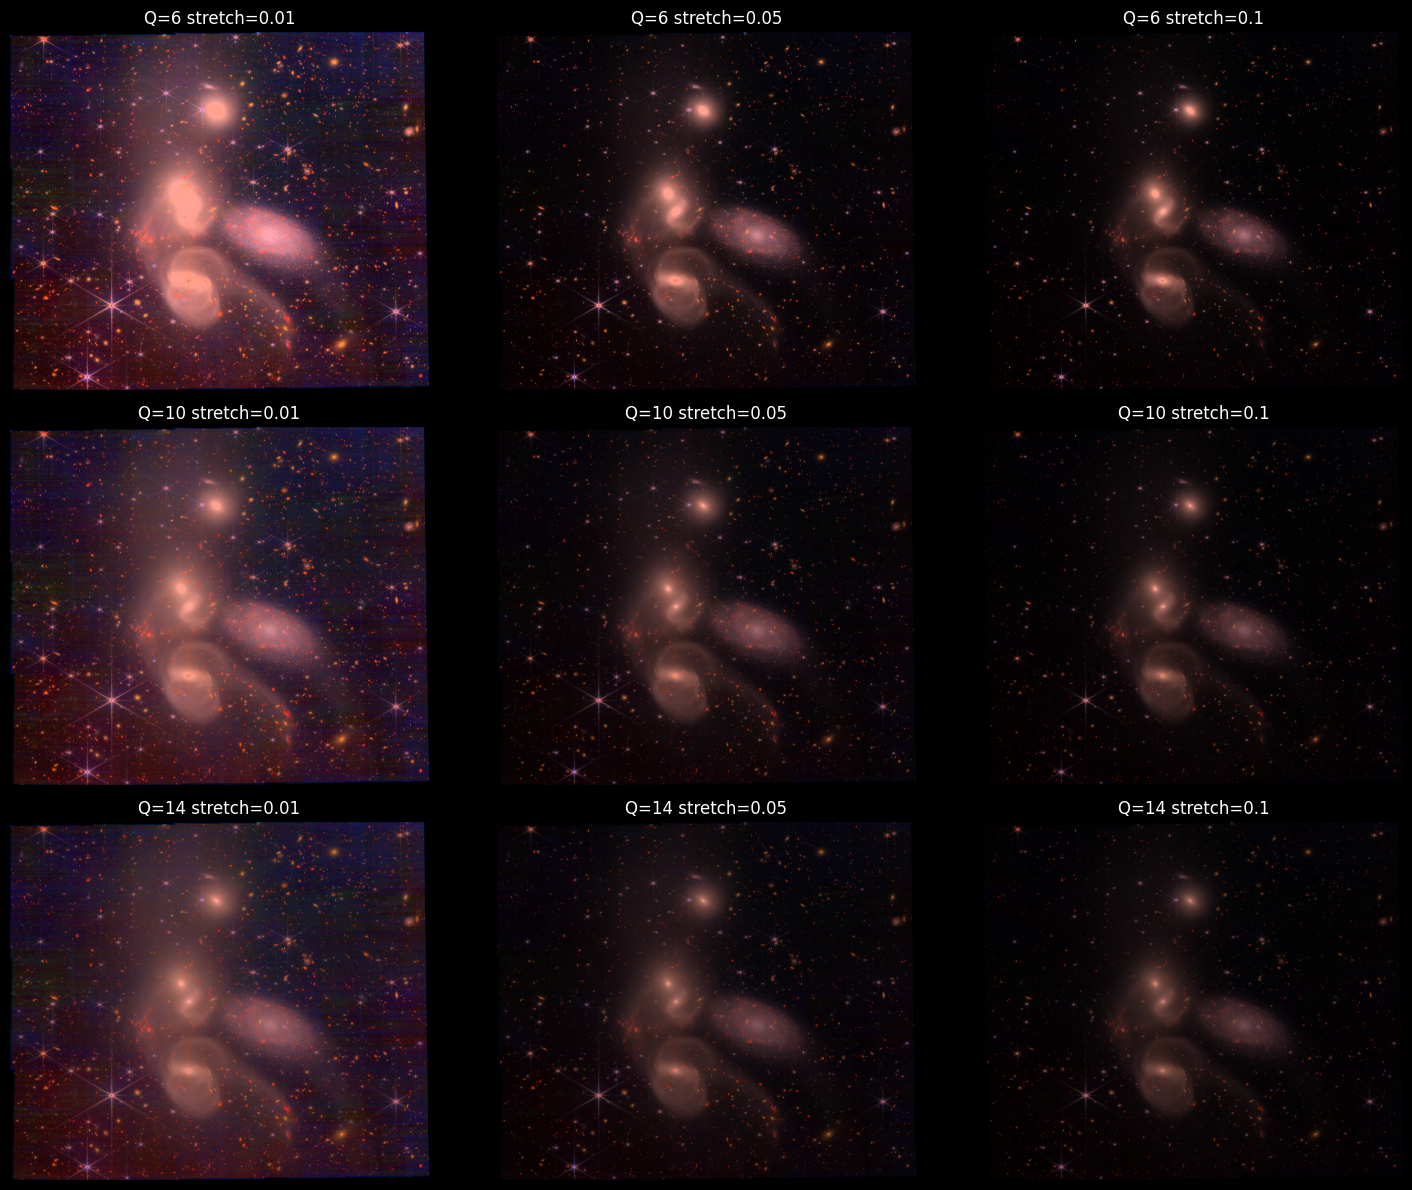

In [11]:
Q_values = [6, 10, 14]
stretch_values = [0.01, 0.05, 0.1]

plt.figure(figsize=(15, 12), facecolor='black')
for i, Q in enumerate(Q_values):
    for j, stretch in enumerate(stretch_values):
        plt.subplot(len(Q_values), len(stretch_values), i*len(stretch_values) + j + 1)
        rgb = make_lupton_rgb(red * 1.0, green * 1.1, blue * 1.5, Q=Q, stretch=stretch)
        plt.imshow(rgb, origin='lower')
        plt.title(f"Q={Q} stretch={stretch}")
        plt.axis('off')

plt.tight_layout()
plt.show()

### Final Result

(np.float64(-0.5), np.float64(7089.5), np.float64(-0.5), np.float64(6056.5))

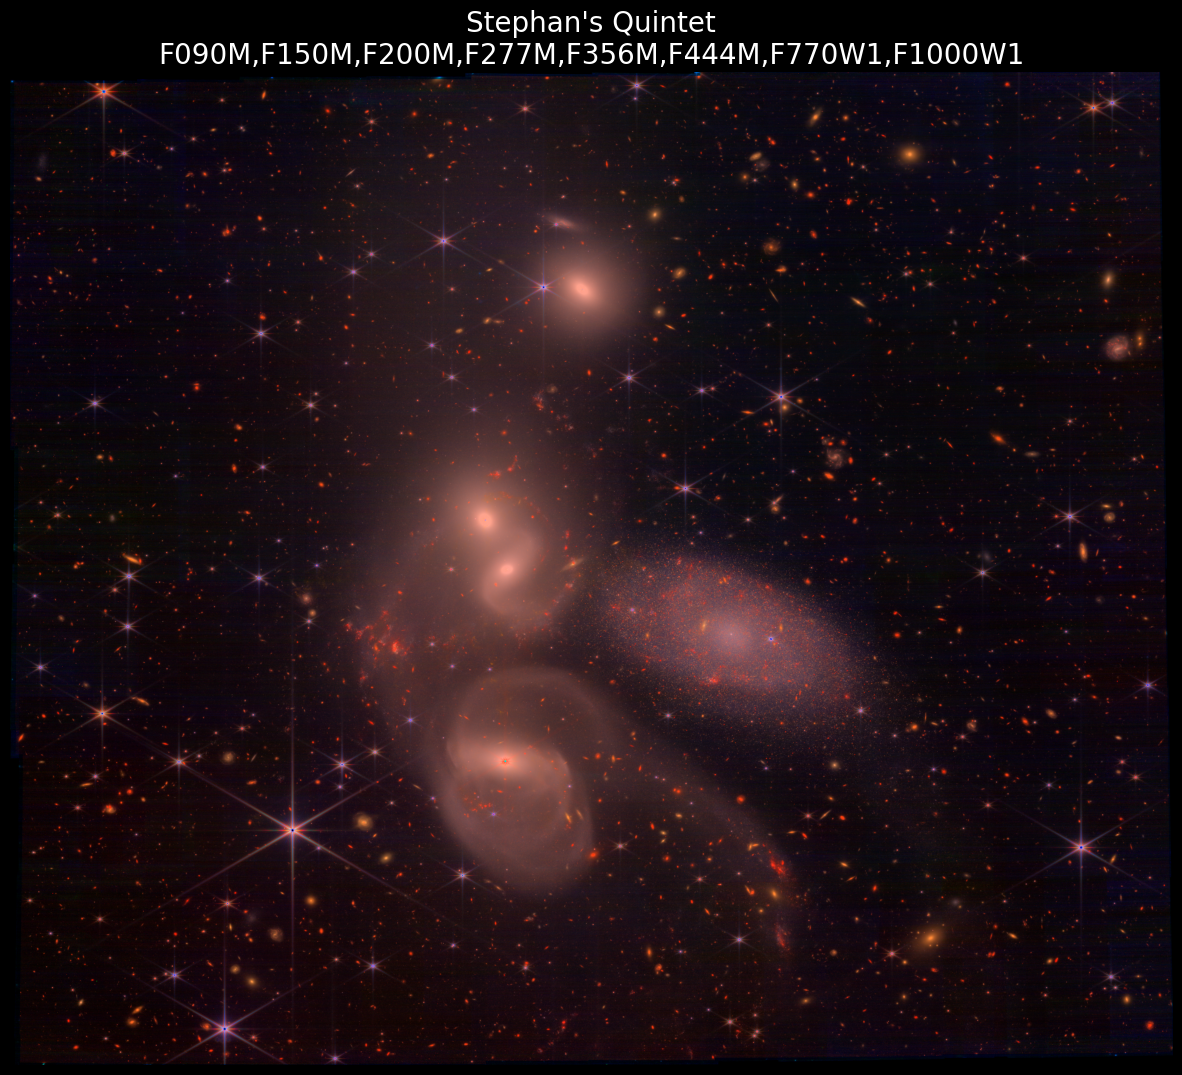

In [13]:
#rgb = make_lupton_rgb(red, green, blue, Q=10, stretch=0.05)
rgb = make_lupton_rgb(red * 1.0, green * 1.1, blue * 1.5, Q=10, stretch=0.03, filename='results/final_result.png')

# Plot and save
plt.figure(figsize=(15, 15), facecolor='black')
plt.imshow(rgb, origin='lower')
plt.title("Stephan's Quintet\nF090M,F150M,F200M,F277M,F356M,F444M,F770W1,F1000W1", fontsize=20)
plt.axis('off')